# **Financial Applicactions with ML & AI**

<img style="float: right;" src="https://github.com/torreblanca99/course_financial_applications/blob/develop/docs/img/logo_bourbaki.png?raw=1" width="100"/>

## **Module III:** AI & Finance
#### Topic: Introduction to NLP

##### Name: Julio César Avila Torreblanca

- **Objective**: understand a basic probles of Natural Lenguage Process
- **Contents**:
    - Notes:
        - Natural Lenguage Process
    - Code:
        1. Libraries and parameters
        2. Reading data
        3. Preprocessing data
        4. Modeling
        5. Training
        6. Evaluation
----

# Natural Language Processing (NLP) in Financial Applications

## Introduction
Natural Language Processing (NLP) allows us to vectorize and process text data, considering semantics and syntax for more complex tasks, such as text summarization and translation. Traditional methods often fall short in capturing these intricate relationships.

## Word Embeddings and Vectorization

### Word2Vec
Word2Vec is a technique used to construct semantic embeddings of words using dense neural networks. It captures the contextual relationships between words, making it a popular method in NLP tasks.

#### Skip-gram Model
The Skip-gram model predicts the surrounding context words based on the current word, creating a supervised dataset for training. Essential steps include:
1. A large corpus of text (e.g., Wikipedia articles) is utilized.
2. A context window size $ p $ is defined.
3. For each word $ w_t $, the explanatory variables vector is made using one-hot encoding.
4. This vector is supervised by the one-hot encodings of the surrounding words $ w_{t-p}, \ldots, w_{t-1}, w_{t+1}, \ldots, w_{t+p} $.
5. A neural network is trained using this supervised dataset to obtain the vector embeddings.

### Continuous Bag of Words (CBOW)
CBOW is another neural network model that predicts a target word based on its context. The CBOW model uses the softmax function to achieve this.

Given a vector $ \boldsymbol{v} = (v_1, v_2, \ldots, v_d) \in \mathbb{R}^d $, the softmax function is defined as:

$$
\text{Softmax}(\boldsymbol{v}) = \left( \frac{e^{v_1}}{\sum_{j \leq d} e^{v_j}}, \ldots, \frac{e^{v_d}}{\sum_{j \leq d} e^{v_j}} \right)
$$

**Properties of Softmax:**
1. Each output element is in the range $[0, 1]$.
2. The sum of the output elements is 1.

The CBOW model is defined as a family of functions $ \text{CBOW}_n : \mathbb{R}^{nd} \to \mathbb{R}^d $ for $ n \in \mathbb{N} $:

$$
\text{CBOW}_n (x_1, x_2, \ldots, x_n) = \text{Softmax} \left(\beta' \left( \frac{1}{n} \sum_{j \leq n} (\beta x_j) \right)\right)
$$
where $ \beta \in \mathbb{R}^{kd}, \beta' \in \mathbb{R}^{dk} $.

## Advantages and Disadvantages

### Advantages:
- **Semantic Understanding:** Models like Word2Vec capture meaningful semantic relationships between words.
- **Flexibility:** Techniques like CBOW adapt to varying input dimensions, essential for tasks like translation or text summarization.

### Disadvantages:
- **Complexity:** Neural network-based models can be computationally expensive and require significant data for training.
- **Context Limitation:** Fixed window sizes may struggle with long-range dependencies in the text.

## Example of Training an NLP Algorithm

1. **Data Collection:**
   - Gather a large and relevant corpus of text data. This could include sources like Wikipedia articles, news articles, and financial reports.

2. **Preprocessing:**
   - **Tokenization:** Split the text into individual tokens (words or phrases).
   - **Lowercasing:** Convert all text to lowercase to ensure uniformity.
   - **Removal of Stopwords:** Eliminate common words that do not contribute meaningful information to the analysis, such as "the," "and," "a." These are known as *stopwords*.

3. **Text Normalization:**
   - **Stemming and Lemmatization:** Reduce words to their base or root form (eg. remove conjugangations).
   - **Handling Punctuation:** Remove or handle punctuation marks as needed.

4. **Vectorization:**
   - Convert text data into numerical form using methods such as:
     - **One-hot Encoding:** Represents each word as a vector that is mostly zeros except for a single one.
     - **Word Embeddings:** Use models like Word2Vec or GloVe to create dense vector representations that capture semantic meaning.

5. **Building the Model:**
   - Choose a suitable machine learning or deep learning model (e.g., neural networks, LSTMs, or transformers).
   - Define the architecture based on the NLP task (e.g., sentiment analysis, text summarization).

6. **Training the Model:**
   - Use the processed and vectorized text data to train the model.
   - Divide the dataset into a training set and a validation set.
   - Monitor performance using evaluation metrics relevant to the task.

7. **Evaluation and Tuning:**
   - Test the model with unseen data to evaluate its accuracy and generalization.
   - Tune hyperparameters to improve model performance.

8. **Deployment:**
   - Integrate the trained model into an application or system for real-time text processing.

## Key Concepts

- **Stopword:**
  - Stopwords are common words in a language that are often filtered out before processing text. They are usually considered to carry less important meaning, hence removing them helps in concentrating on more meaningful words.

- **WordNet:**
  - WordNet is a lexical database for the English language that groups words into sets of synonyms called synsets, providing short definitions and usage examples. It helps in capturing relationships between words, such as their hierarchies and similarities.

## Conclusion
NLP using methods like Word2Vec and CBOW significantly enhances the ability of machine learning systems to process and understand natural language data. These methods provide crucial insights into the semantic and syntactical structure of language, enabling more complex and accurate computational tasks in finance and beyond.

---

# 1. Libraries and parameters

In [1]:
import pandas as pd
import numpy as np

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Download NLTK resources for NLP
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/javilatorreb/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/javilatorreb/nltk_data...


True

# 2. Reading Data 
### [[Datastes](https://arxiv.org/pdf/1908.10063.pdf)]

In [39]:
data = pd.read_csv(
    'Sentences_AllAgree.txt',
    sep=' .@', 
    names=['text','label'], 
    encoding='utf-8', 
    engine='python'
)

data.shape

(2264, 2)

In [40]:
data.head()

,text,label
0,"According to Gran , the company has no plans t...",neutral
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,"In the third quarter of 2010 , net sales incre...",positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive


In [41]:
data.iloc[0,0]

'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing'

# 3. Preprocessing data

## 3.1 Auxiliar Functions

In [42]:
def remove_stopwords(text, lang):
    """
    Removes stopwords from a text.

    Args:
        text (str): Input text.
        lang (str): Language of the text (e.g., 'english').

    Returns:
        str: Text without stopwords.
    """
    stop = re.compile(r'\b(' + r'|'.join(stopwords.words(lang)) + r')\b\s*')
    new_text = stop.sub('', text)
    return new_text


def remove_punctuation_and_numbers(text):
    """
    Removes punctuation and numbers from a text, leaving only letters.

    Args:
        text (str): Input text.

    Returns:
        str: Text without punctuation or numbers.
    """
    new_text = re.sub('[^a-z]+', ' ', text)
    return new_text


def lemmatize(text):
    """
    Lemmatizes the words in a text in English, reducing them to their 
    base form.

    Args:
        text (str): Input text.

    Returns:
        str: Lemmatized text.
    """
    lemma = WordNetLemmatizer()
    words = text.split()
    new_text = " ".join([lemma.lemmatize(word) for word in words])
    return new_text


def stemmer(text, lang):
    """
    Applies stemming to the words in a text, reducing them to their root.

    Args:
        text (str): Input text.
        lang (str): Language of the text (e.g., 'english').

    Returns:
        str: Text with words reduced to their root.
    """
    st = SnowballStemmer(lang)
    words = text.split()
    new_text = ' '.join([st.stem(word) for word in words])
    return new_text


def preprocess(text, lang):
    """
    Preprocesses a text by applying several transformations:
    - Converts to lowercase.
    - Removes stopwords.
    - Removes punctuation and numbers.
    - Applies stemming.

    Args:
        text (str): Input text.
        lang (str): Language of the text (e.g., 'english').

    Returns:
        str: Preprocessed text.
    """
    text = text.lower()
    text = remove_stopwords(text, lang)
    text = remove_punctuation_and_numbers(text)
    text = stemmer(text, lang)
    return text

In [43]:
# example using the above functions
eg_string = 'Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, ' \
            'lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the ' \
            'last few characters, often leading to incorrect meanings and spelling errors.'


eg_string = eg_string.lower()
eg_string   

'lemmatization is the process of converting a word to its base form. the difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.'

In [44]:
remove_stopwords(eg_string, 'english')

'lemmatization process converting word base form. difference stemming lemmatization , lemmatization considers context converts word meaningful base form, whereas stemming removes last characters, often leading incorrect meanings spelling errors.'

In [45]:
remove_punctuation_and_numbers(eg_string)

'lemmatization is the process of converting a word to its base form the difference between stemming and lemmatization is lemmatization considers the context and converts the word to its meaningful base form whereas stemming just removes the last few characters often leading to incorrect meanings and spelling errors '

In [46]:
stemmer(eg_string, 'english')

'lemmat is the process of convert a word to it base form. the differ between stem and lemmat is, lemmat consid the context and convert the word to it meaning base form, wherea stem just remov the last few characters, often lead to incorrect mean and spell errors.'

In [47]:
lemmatize(eg_string)

'lemmatization is the process of converting a word to it base form. the difference between stemming and lemmatization is, lemmatization considers the context and convert the word to it meaningful base form, whereas stemming just remove the last few characters, often leading to incorrect meaning and spelling errors.'

## 3.2 Data cleaning

### Remove NA

In [48]:
data['label'].value_counts(dropna=False)

label
neutral     1363
positive     561
negative     296
None          44
Name: count, dtype: int64

In [49]:
data.isnull().sum()

text      0
label    44
dtype: int64

In [50]:
data = data.dropna()
data.shape

(2220, 2)

### Use Auxiliar Functions

In [51]:
data['text_pp'] = data['text'].apply(lambda x: preprocess(x, 'english'))

### Visualization

In [52]:
porClase = data.groupby('label')
positivas = porClase.get_group('positive').text_pp
negativas = porClase.get_group('negative').text_pp
neutras = porClase.get_group('neutral').text_pp

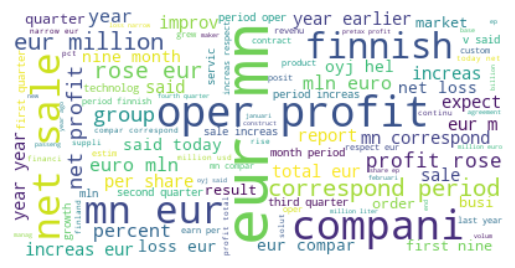

In [53]:
text = " ".join(review for review in positivas)

# Crear la nube de palabras
wordcloud = WordCloud(max_font_size=50,
                    max_words=100,
                    background_color="white").generate(text)

# Mostrar nuestro gráfico
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

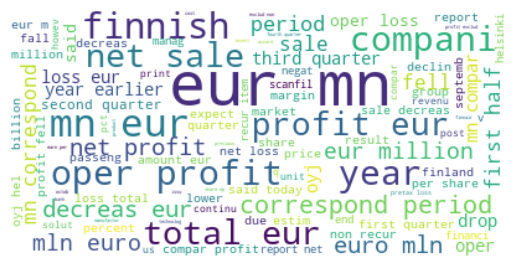

In [54]:
text = " ".join(review for review in negativas)

# Crear la nube de palabras
wordcloud = WordCloud(max_font_size=50,
                    max_words=100,
                    background_color="white").generate(text)

# Mostrar nuestro gráfico
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

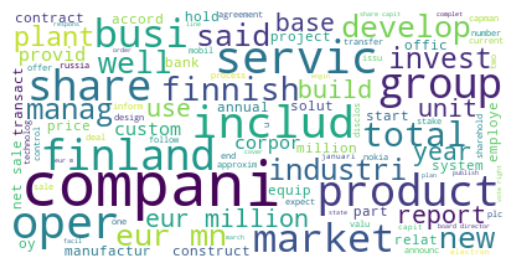

In [55]:
text = " ".join(review for review in neutras)

# Crear la nube de palabras
wordcloud = WordCloud(max_font_size=50,
                    max_words=100,
                    background_color="white").generate(text)

# Mostrar nuestro gráfico
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 4. Modeling

### Embeding

In [56]:
# BOW: Bag Of Words
vectorizer = TfidfVectorizer(min_df=30)
BOW_en = vectorizer.fit_transform(data['text_pp'])
BOW_en.shape

(2220, 125)

In [57]:
palabras = vectorizer.get_feature_names_out()
X = pd.DataFrame(BOW_en.todense(), index=data.index, columns=palabras)
X.shape

(2220, 125)

In [58]:
X.head()

,accord,agreement,also,amount,announc,annual,approxim,april,area,bank,...,transact,two,unit,us,usd,use,valu,well,would,year
0,0.486417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24727
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [59]:
y = data['label']

In [61]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
     

(1776, 125) (444, 125) (1776,) (444,)


### Logistic Regression

In [62]:
clasifier = LogisticRegression()
clf = clasifier.fit(X_train, y_train)

# 5. Training

In [63]:
y_pred = clf.predict(X_test)

# 6. Evaluation

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.77      0.51      0.61        65
     neutral       0.83      0.91      0.86       257
    positive       0.63      0.61      0.62       122

    accuracy                           0.77       444
   macro avg       0.74      0.68      0.70       444
weighted avg       0.76      0.77      0.76       444



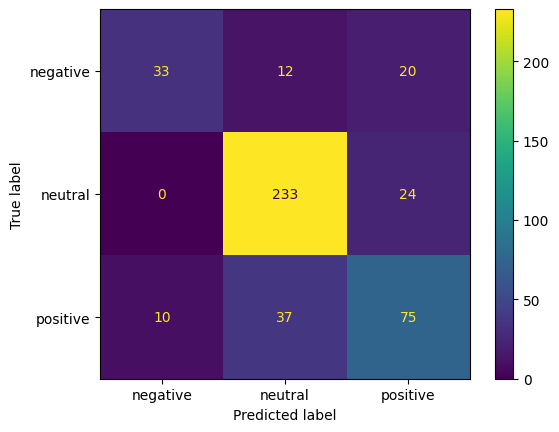

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay, log_loss

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [66]:
# loss fnction
log_loss(y_test, clf.predict_proba(X_test))

0.5805673289689371